# CS 445 Final Project - Image Morphing

## Setup and Load Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

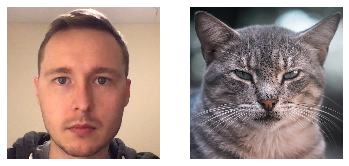

In [2]:
# Read in the source and target images
source_img = cv2.imread('./images/inputs/andrew.jpg')
target_img = cv2.imread('./images/inputs/cat.jpg')

assert source_img.shape == target_img.shape
H, W, C = source_img.shape

fix, axes = plt.subplots(1, 2)
[a.axis('off') for a in axes.ravel()]
axes[0].imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))

## Select Corresponding Points

In [3]:
'''
Display the image and collect points clicked on the image.

Heavily referenced from UIUC CS445 MP3 utils.py in starter code.
'''
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select corresponding points in the image')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    clicked = []
    
    def on_mouse_pressed(event):
        x = event.xdata
        y = event.ydata
        plt.plot(x, y, 'r+')
        clicked.append((x, y))
        
    fig.canvas.mpl_connect('button_press_event', on_mouse_pressed)
    
    return clicked

<IPython.core.display.Javascript object>


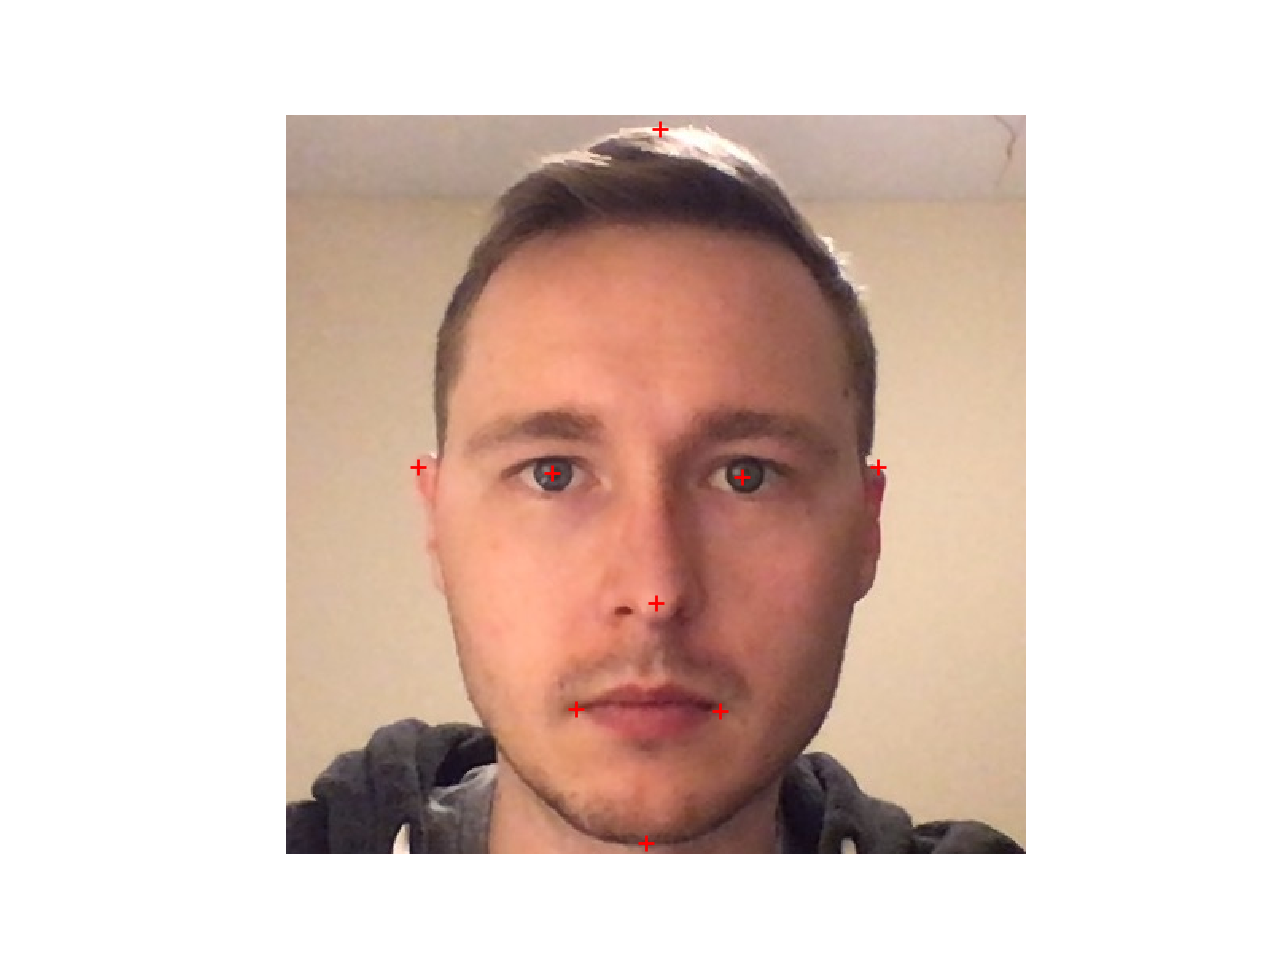

In [4]:
# Select corresponding points on the images
%matplotlib notebook
source_points = specify_points(source_img)

<IPython.core.display.Javascript object>


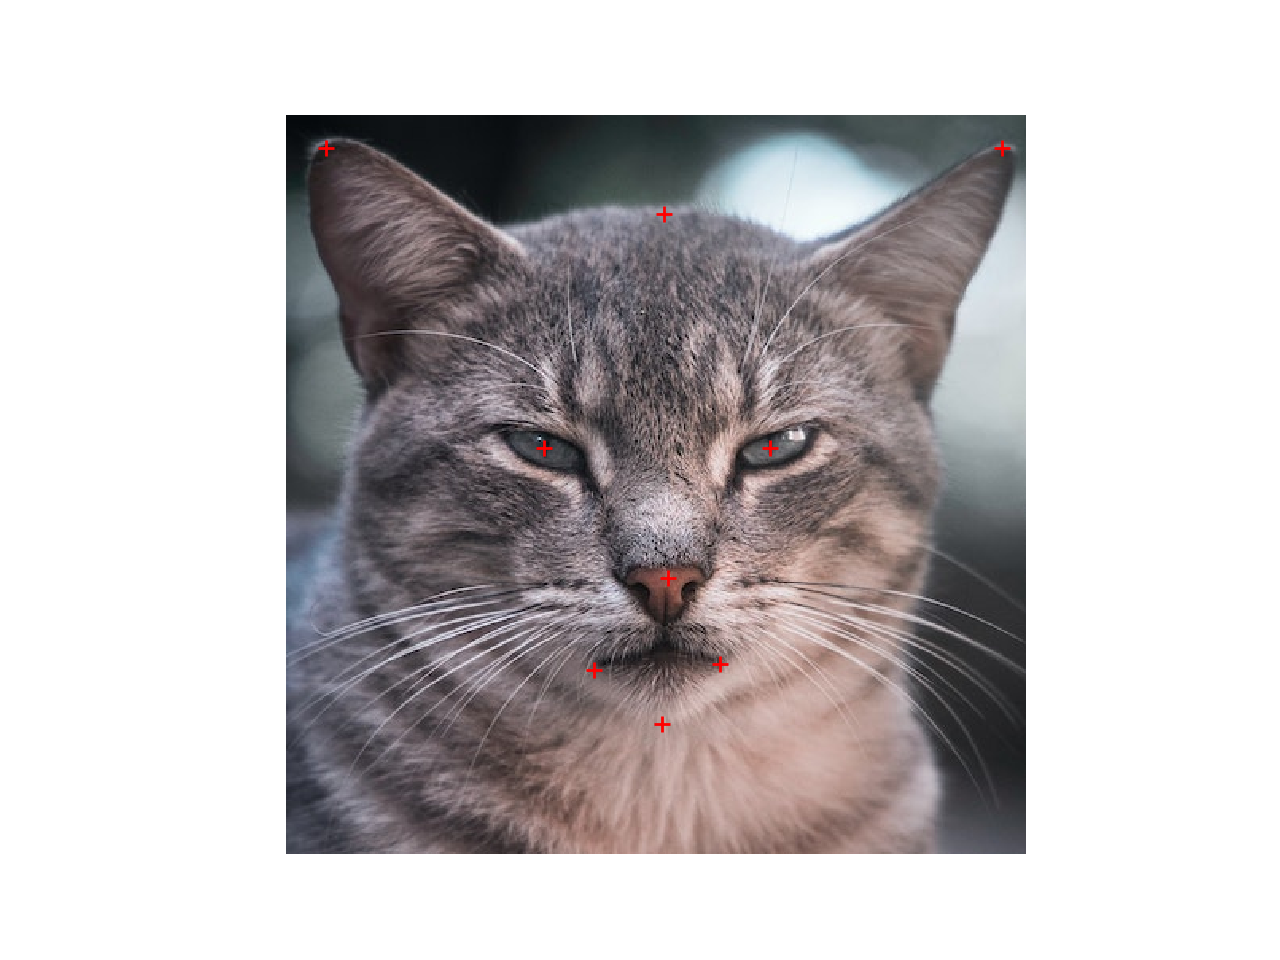

In [5]:
%matplotlib notebook
target_points = specify_points(target_img)

In [6]:
print(source_points)
print(target_points)

[(166.65655438311683, 224.36087155032465), (286.17765827922074, 226.8771053165584), (82.36272321428567, 220.58652090097405), (371.72960633116884, 220.58652090097405), (181.75395698051943, 372.8186637581169), (272.338372564935, 374.07678064123377), (232.0786323051948, 306.13846895292204), (234.59486607142856, 7.964767654220736), (225.78804788961037, 457.11249492694805)]
[(161.6240868506493, 208.79167512175326), (303.7912946428571, 208.79167512175326), (24.48934659090901, 20.074142654220793), (449.73285308441564, 20.074142654220793), (193.0770089285714, 348.44264914772725), (272.338372564935, 344.66829849837666), (239.6273336038961, 290.56927252435065), (237.11109983766232, 61.591999797077904), (235.85298295454544, 382.4118049918831)]


In [7]:
# Add the points at the corners of the images
source_points.extend([(0, 0), (0, W-1), (H-1, 0), (H-1, W-1)])
target_points.extend([(0, 0), (0, W-1), (H-1, 0), (H-1, W-1)])
assert len(source_points) == len(target_points)

[(166.65655438311683, 224.36087155032465), (286.17765827922074, 226.8771053165584), (82.36272321428567, 220.58652090097405), (371.72960633116884, 220.58652090097405), (181.75395698051943, 372.8186637581169), (272.338372564935, 374.07678064123377), (232.0786323051948, 306.13846895292204), (234.59486607142856, 7.964767654220736), (225.78804788961037, 457.11249492694805), (0, 0), (0, 464), (464, 0), (464, 464)]


<IPython.core.display.Javascript object>


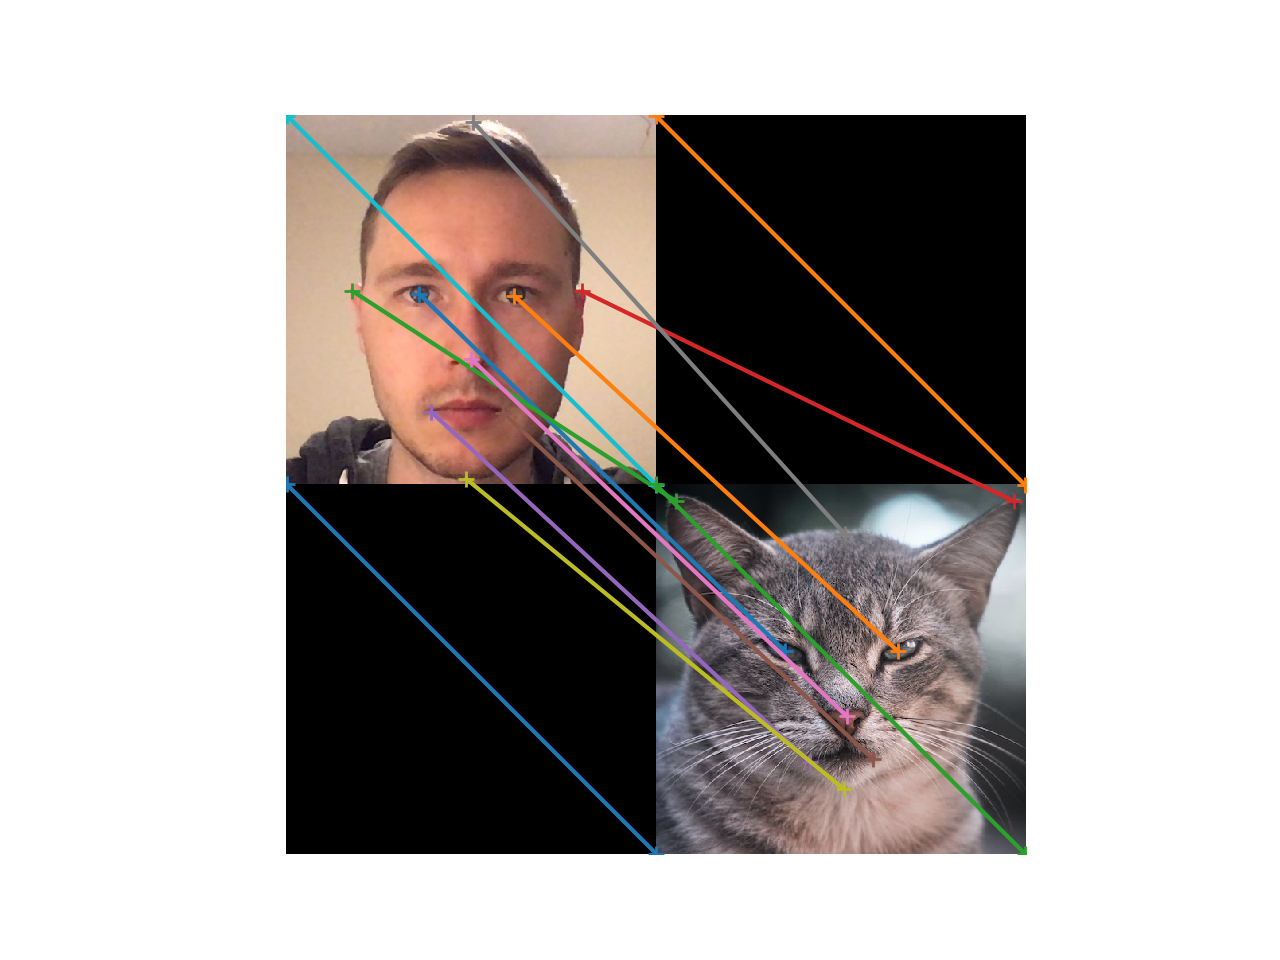

In [15]:
# Display the connected points to verify
mapping_img = np.zeros(shape=(2 * H, 2 * W, C), dtype='uint16')
for h in range(0, H):
    for w in range(0, W):
        for c in range(0, C):
            mapping_img[h][w][c] = source_img[h][w][c]
            mapping_img[h+H][w+W][c] = target_img[h][w][c]

fig = plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(mapping_img, cv2.COLOR_BGR2RGB))

for p in range(0, len(source_points)):
    x1 = source_points[p][0]
    y1 = source_points[p][1]
    x2 = target_points[p][0] + W
    y2 = target_points[p][1] + H
    plt.plot([x1, x2], [y1, y2], marker = '+')

## Compute Delaunay Triangulation